In [1]:
import numpy as np
from scipy import *
import matplotlib.pyplot as plt
import time
import random
import math
import pandas as pd
import matplotlib
import itertools
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D


# Objective Function Definning
เป็น Ackley Function ที่กลับด้าน และเลื่อนขนานให้จุด Global Maxima เป็น (2.15, -1.5, 0) (0 คือค่าสูงสุดของฟังก์ชันนี้)


In [2]:
def objective(x, y):
	return -(-20.0 * exp(-0.2 * sqrt(0.5 * ((x-2.15)**2 + (y+1.5)**2))) - exp(0.5 * (cos(2 * pi * (x-2.15)) + cos(2 * pi * (y+1.5)))) + e + 20)

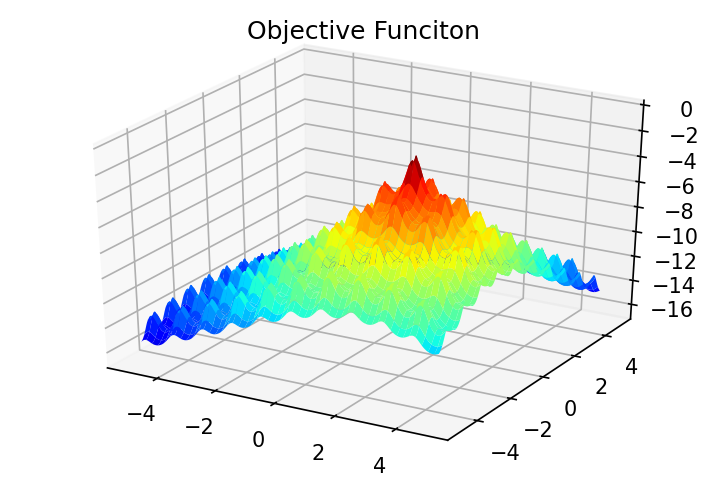

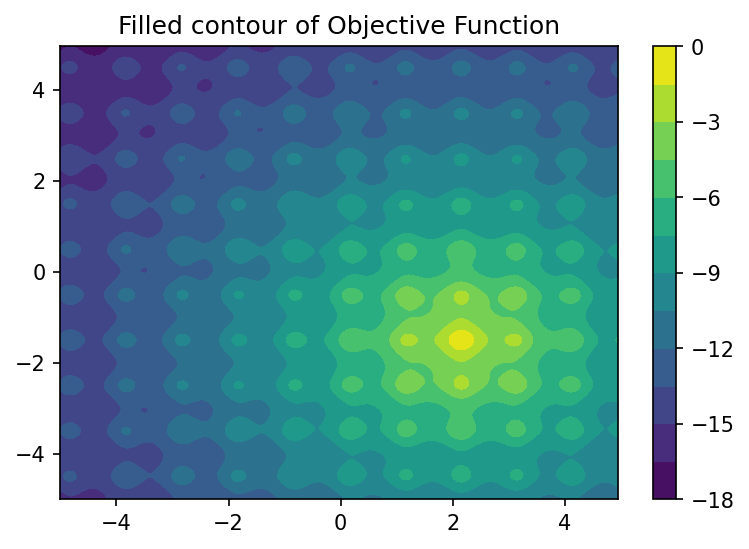

In [3]:
# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.05)
yaxis = arange(r_min, r_max, 0.05)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = plt.figure(dpi = 150)

axis = figure.gca(projection='3d')
axis.set_title("Objective Funciton")
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
plt.show()

levels = []
j = -19.5
Boole = True
while Boole:
    j += 1.5
    if j >= 0:
        Boole = False
    levels.append(j)
fig,ax=plt.subplots(1,1,dpi = 150)
cp = ax.contourf(x, y, results, levels=levels)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled contour of Objective Function')
plt.show()

# Cells Method Function Defining


In [4]:
class Optimization:
  def __init__(self,distribution_num,parameter_num,param_limit,param_lr):
    self.n = distribution_num
    self.np = parameter_num
    self.lim = param_limit #2d list [[,],[,]]
    self.param_lr = param_lr

  def Initiate(self):
    param_init = []
    for i,limit in enumerate(self.lim):
      if self.n[i] == 1:
        a = []
        b = limit[1]-limit[0]/2
        a.append(limit[0]+b)
      else:
        a = []
        b = (limit[1]-limit[0])/((self.n[i]-2)+1)
        for i in range(self.n[i]):
            a.append(limit[0]+(i*b))
      param_init.append(a)
    p = itertools.product(*param_init)
    output = [list(i) for i in p]
    return output

  def Breed(self,init_coor,lr_indices):
    lr = self.param_lr
    list_a = []
    for coor in init_coor:
      list_b = []  
      for i,point in enumerate(coor):
        list_c = []
        if point+lr[i][lr_indices] <= self.lim[i][1]:
          list_c.append(point+lr[i][lr_indices])
        list_c.append(point+0)
        if point-lr[i][lr_indices] >= self.lim[i][0]:
          list_c.append(point-lr[i][lr_indices])
        list_b.append(list_c)
      list_a.append(list_b)
    output = []
    for cell in list_a:
      p = itertools.product(*cell)
      result = [list(i) for i in p]
      output.append(result)
    
    return output
def Select(Pt_List,n):
    numbers = np.array(Pt_List)
    idx = np.argpartition(numbers, -n)[-n:]
    indices = idx[np.argsort((-numbers)[idx])]
    return indices

# Cells Method

In [5]:
#การกำหนด Hyperr Parameter สำหรับการ Optimize

Generation = 20       #จะมีการปรับกี่ Generation
x_lr = [1,0.5,0.1,0.01]             #lr จะปรับเมื่อเจอคำตอบซ้ำ ๆ 
y_lr = [1,0.5,0.1,0.01]     
param_lr = [x_lr,y_lr]               #จำนวนของร้านที่ดีที่สุดที่จะเลือก
opt = Optimization([4,4],2,[[-5,5],[-5,5]],param_lr)
#__init__(self,distribution_num,parameter_num,param_limit,param_lr)

In [6]:
runtime_his = []
contime_his = []
fitness_his = []
X_his = []
Y_his = []

for iteration in range(10):
    init = opt.Initiate()
    MaxParam_History = []
    MaxPt_History = []
    MaxQ_History = []
    MaxPri_History = []
    duplication_count = 0
    start = time.time()
    end0 = []
    lr_index = 0
    stabilized_generation = Generation-1

    for gen in range(Generation):
        Best_Param_History = []
        param = opt.Breed(init,lr_index) 
        init_len = len(init)
        init = []
        Best_of_cell_History = []
        BestPt_of_cell_History = []
        for i in range(init_len):
            cell = param[i]
            Pt_List = []
            ParamHistory = []
            output = []
            for index,parameter in enumerate(cell):
                X_param = parameter[0]
                Y_param = parameter[1]
                
                pt = objective(X_param, Y_param)
                Pt_List.append(pt)
                ParamHistory.append([X_param,Y_param])
                    
            Survived_index = Select(Pt_List,1)[0]
            Best_of_cell = ParamHistory[Survived_index]
            Best_X = Best_of_cell[0]
            Best_Y = Best_of_cell[1]
            Best_Pt = Pt_List[Survived_index]
            BestPt_of_cell_History.append(Best_Pt)
            Best_of_cell_History.append(Best_of_cell)
            init.append([Best_X,Best_Y])

        Pt_of_each_cell = []
        for pt in BestPt_of_cell_History:
            Pt_of_each_cell.append(pt)

        Best_index = Select(Pt_of_each_cell,1)[0]
        Best_of_gen_param = Best_of_cell_History[Best_index]
        MaxParam_History.append(Best_of_gen_param)
        MaxPt_History.append(Pt_of_each_cell[Best_index])

        if (gen+1)%5 == 0:
            print("Gen",gen+1,"has finished")
        if gen >= 2:
            if MaxPt_History[-1] == MaxPt_History[-2]:
                duplication_count += 1
            else :
                duplication_count = 0

            if duplication_count % 3 == 0 and duplication_count != 0:
                stabilized_generation = gen - duplication_count
                if lr_index < len(x_lr)-1: 
                    lr_index += 1
                else:
                    lr_index = 0
        end0.append(time.time())

    end = time.time()
    print(f"Runtime of the program is {end - start}")
    print(f"Runtime Before Stable is {end0[stabilized_generation]-start}")
    print(f"Converged Generation is {stabilized_generation}")
    runtime_his.append(end - start)
    contime_his.append(end0[stabilized_generation]-start)
    fitness_his.append(MaxPt_History[-1])
    X_his.append(MaxParam_History[-1][0])
    Y_his.append(MaxParam_History[-1][1])


Gen 5 has finished
Gen 10 has finished
Gen 15 has finished
Gen 20 has finished
Runtime of the program is 0.026056528091430664
Runtime Before Stable is 0.015280485153198242
Converged Generation is 11
Gen 5 has finished
Gen 10 has finished
Gen 15 has finished
Gen 20 has finished
Runtime of the program is 0.031047344207763672
Runtime Before Stable is 0.018594741821289062
Converged Generation is 11
Gen 5 has finished
Gen 10 has finished
Gen 15 has finished
Gen 20 has finished
Runtime of the program is 0.029491662979125977
Runtime Before Stable is 0.015650272369384766
Converged Generation is 11
Gen 5 has finished
Gen 10 has finished
Gen 15 has finished
Gen 20 has finished
Runtime of the program is 0.03467702865600586
Runtime Before Stable is 0.018280982971191406
Converged Generation is 11
Gen 5 has finished
Gen 10 has finished
Gen 15 has finished
Gen 20 has finished
Runtime of the program is 0.03711748123168945
Runtime Before Stable is 0.020720720291137695
Converged Generation is 11
Gen 5 h

In [8]:
runtime_his = np.array(runtime_his)
runtime_his = np.reshape(runtime_his,(runtime_his.size,-1))
contime_his = np.array(contime_his)
contime_his = np.reshape(contime_his,(contime_his.size,-1))
fitness_his = np.array(fitness_his)
fitness_his = np.reshape(fitness_his,(fitness_his.size,-1))
X_his = np.array(X_his)
X_his = np.reshape(X_his,(X_his.size,-1))
Y_his = np.array(Y_his)
Y_his = np.reshape(Y_his,(Y_his.size,-1))


In [9]:
result = np.concatenate((fitness_his,X_his,Y_his,runtime_his,contime_his),1)
Cells_result = pd.DataFrame(result,columns = ["Fitness","x","y","Runtime","Converged Time"])

In [10]:
Cells_result.to_excel("Akley_Cells_Result.xlsx")

In [21]:
Cells_result

,Fitness,x,y,Runtime,Converged Time
0,-3.552714e-15,2.15,-1.5,0.026057,0.015280
1,-3.552714e-15,2.15,-1.5,0.031047,0.018595
2,-3.552714e-15,2.15,-1.5,0.029492,0.015650
3,-3.552714e-15,2.15,-1.5,0.034677,0.018281
4,-3.552714e-15,2.15,-1.5,0.037117,0.020721
5,-3.552714e-15,2.15,-1.5,0.038454,0.021594
6,-3.552714e-15,2.15,-1.5,0.033695,0.018731
7,-3.552714e-15,2.15,-1.5,0.030416,0.018032
8,-3.552714e-15,2.15,-1.5,0.027136,0.016964
9,-3.552714e-15,2.15,-1.5,0.027828,0.016321


# Differential Evolution


In [11]:
def f(x):
    return -objective(x[0],x[1])

In [12]:
from scipy.optimize import differential_evolution

fitness_his = []
runtime_his = []
X_his = []
Y_his = []

for i in range(10):
    bounds = [[-5,5], [-5,5]]
    start = time.time()
    result = differential_evolution(f, bounds, maxiter = 50)
    end = time.time()
    # summarize the result
    print('Status : %s' % result['message'])
    print('Total Evaluations: %d' % result['nfev'])
    # evaluate solution
    solution = result['x']
    evaluation = -f(solution)
    print('Solution: f(%s) = %.5f' % (solution, evaluation))
    fitness_his.append(evaluation)
    runtime_his.append(end-start)
    X_his.append(solution[0])
    Y_his.append(solution[1])
    print(f'Time spent is {end-start} s')

Status : Maximum number of iterations has been exceeded.
Total Evaluations: 1695
Solution: f([ 2.15000002 -1.49999997]) = -0.00000
Time spent is 0.1007845401763916 s
Status : Maximum number of iterations has been exceeded.
Total Evaluations: 1593
Solution: f([ 2.15 -1.5 ]) = -0.00000
Time spent is 0.0764017105102539 s
Status : Maximum number of iterations has been exceeded.
Total Evaluations: 1689
Solution: f([ 2.15 -1.5 ]) = -0.00000
Time spent is 0.07765388488769531 s
Status : Maximum number of iterations has been exceeded.
Total Evaluations: 1593
Solution: f([ 2.15 -1.5 ]) = -0.00000
Time spent is 0.07882094383239746 s
Status : Maximum number of iterations has been exceeded.
Total Evaluations: 1590
Solution: f([ 2.15 -1.5 ]) = -0.00000
Time spent is 0.07497549057006836 s
Status : Maximum number of iterations has been exceeded.
Total Evaluations: 1593
Solution: f([ 2.15 -1.5 ]) = -0.00000
Time spent is 0.07651138305664062 s
Status : Maximum number of iterations has been exceeded.
Tot

In [13]:
runtime_his = np.array(runtime_his)
runtime_his = np.reshape(runtime_his,(runtime_his.size,-1))
fitness_his = np.array(fitness_his)
fitness_his = np.reshape(fitness_his,(fitness_his.size,-1))
X_his = np.array(X_his)
X_his = np.reshape(X_his,(X_his.size,-1))
Y_his = np.array(Y_his)
Y_his = np.reshape(Y_his,(Y_his.size,-1))
result = np.concatenate((fitness_his,X_his,Y_his,runtime_his),1)
Dif_Evo_result = pd.DataFrame(result,columns = ["Fitness","x","y","Runtime"])

In [14]:
Dif_Evo_result.to_excel("Akley_Dif_Evo.xlsx")

In [15]:
Dif_Evo_result

,Fitness,x,y,Runtime
0,-9.903177e-08,2.15,-1.5,0.100785
1,-5.429861e-10,2.15,-1.5,0.076402
2,-7.810858e-09,2.15,-1.5,0.077654
3,-6.742624e-10,2.15,-1.5,0.078821
4,-1.183547e-09,2.15,-1.5,0.074975
5,-4.822670e-09,2.15,-1.5,0.076511
6,-1.340089e-08,2.15,-1.5,0.091565
7,-1.921757e-08,2.15,-1.5,0.082705
8,-5.053781e-09,2.15,-1.5,0.076494
9,-3.235940e-08,2.15,-1.5,0.081685


# Dual Annealing


In [16]:
def f(x):
    return -objective(x[0],x[1])

In [17]:
from scipy.optimize import dual_annealing

fitness_his = []
runtime_his = []
X_his = []
Y_his = []

for i in range(10):
    bounds = [[-5,5], [-5,5]]
    start = time.time()
    result = dual_annealing(f, bounds)
    end = time.time()
    # summarize the result
    print('Status : %s' % result['message'])
    print('Total Evaluations: %d' % result['nfev'])
    # evaluate solution
    solution = result['x']
    evaluation = -f(solution)
    print('Solution: f(%s) = %.5f' % (solution, evaluation))
    fitness_his.append(evaluation)
    runtime_his.append(end-start)
    X_his.append(solution[0])
    Y_his.append(solution[1])

Status : ['Maximum number of iteration reached']
Total Evaluations: 4277
Solution: f([ 2.15 -1.5 ]) = -0.00000
Status : ['Maximum number of iteration reached']
Total Evaluations: 4292
Solution: f([ 2.15 -1.5 ]) = -0.00000
Status : ['Maximum number of iteration reached']
Total Evaluations: 4241
Solution: f([ 2.15 -1.5 ]) = -0.00000
Status : ['Maximum number of iteration reached']
Total Evaluations: 4250
Solution: f([ 2.15 -1.5 ]) = -0.00000
Status : ['Maximum number of iteration reached']
Total Evaluations: 4286
Solution: f([ 2.15 -1.5 ]) = -0.00000
Status : ['Maximum number of iteration reached']
Total Evaluations: 4322
Solution: f([ 2.14999999 -1.5       ]) = -0.00000
Status : ['Maximum number of iteration reached']
Total Evaluations: 4205
Solution: f([ 2.14999999 -1.5       ]) = -0.00000
Status : ['Maximum number of iteration reached']
Total Evaluations: 4256
Solution: f([ 2.15       -1.50000001]) = -0.00000
Status : ['Maximum number of iteration reached']
Total Evaluations: 4163
Sol

In [18]:
runtime_his = np.array(runtime_his)
runtime_his = np.reshape(runtime_his,(runtime_his.size,-1))
fitness_his = np.array(fitness_his)
fitness_his = np.reshape(fitness_his,(fitness_his.size,-1))
X_his = np.array(X_his)
X_his = np.reshape(X_his,(X_his.size,-1))
Y_his = np.array(Y_his)
Y_his = np.reshape(Y_his,(Y_his.size,-1))
result = np.concatenate((fitness_his,X_his,Y_his,runtime_his),1)
Anneal_result = pd.DataFrame(result,columns = ["Fitness","x","y","Runtime"])

In [19]:
Anneal_result.to_excel("Akley_Anneal.xlsx")

In [20]:
Anneal_result

,Fitness,x,y,Runtime
0,-1.459791e-08,2.15,-1.5,0.193315
1,-1.075147e-08,2.15,-1.5,0.190319
2,-1.942692e-08,2.15,-1.5,0.203969
3,-1.205091e-08,2.15,-1.5,0.191944
4,-1.048655e-08,2.15,-1.5,0.199849
5,-1.608821e-08,2.15,-1.5,0.193866
6,-1.853919e-08,2.15,-1.5,0.191699
7,-1.979541e-08,2.15,-1.5,0.193848
8,-1.162426e-08,2.15,-1.5,0.204453
9,-1.368833e-08,2.15,-1.5,0.207610
